--------------------------

CE2 - Trabalho 1.

 Grupo 7.

 Seção aluno: Bruno Gondim Toledo | matrícula: 15/0167636. e-mail: bruno.gondim@aluno.unb.br
 
 Prof. Dr. Eduardo Monteiro de Castro Gomes. Universidade de Brasília, 2º/2023



### Informações: Versão Python utilizada na elaboração: Python 3.12.0. IDE: Visual Code Studio.

Brasília, 03 de novembro de 2023


-------------

### Pacotes

In [43]:
import pandas as pd
import numpy as np
import nltk
import unidecode 
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier, Pool
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

------------------------------

### Importação e leitura dos dados

In [44]:
costumers = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_customers_dataset.csv')
itens = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_items_dataset.csv')
payments = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_payments_dataset.csv')
reviews = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_reviews_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_orders_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_products_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_sellers_dataset.csv')

### Junção das tabelas em um banco de dados

In [45]:
df = itens.merge(payments)
df = df.merge(sellers)
df = df.merge(products)
df = df.merge(reviews)
df = df.merge(orders)
df = df.merge(costumers)
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,...,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,...,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,...,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,...,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,fd607d0a02cb276bc764a15f80f0423f,2,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,2018-08-02 02:24:15,171.39,19.35,1,boleto,1,...,delivered,2018-07-26 09:13:04,2018-07-27 02:24:15,2018-08-07 09:28:00,2018-08-16 17:12:37,2018-08-16 00:00:00,c13401002a5f9b60befb4c720de50be0,41820,salvador,BA
117325,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.90,16.14,1,boleto,1,...,delivered,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22 00:00:00,3d50a44231c2a153219cef76ee3e445d,22793,rio de janeiro,RJ
117326,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,1,boleto,1,...,delivered,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04 00:00:00,52a953541861bbb4b79b39df24e00243,13485,limeira,SP
117327,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,1,credit_card,1,...,delivered,2018-04-12 19:47:40,2018-04-12 20:10:33,2018-04-18 00:41:29,2018-04-20 17:48:39,2018-04-30 00:00:00,ddb2249e0316d365ceae561c0f011bce,12280,cacapava,SP


----------

# Análise exploratória

## Review score dos produtos
Aqui, iremos explorar as 5 maiores e 5 menores médias de review score de produtos. Para as tabelas, considerou-se apenas produtos com 30 ou mais unidades vendidas.

In [46]:
df.groupby('product_id').filter(lambda x: len(x) >= 30).groupby('product_id')['review_score'].mean().sort_values(ascending=False).head(5)

product_id
0554911df28fda9fd668ce5ba5949695    5.000000
ebf9bc6cd600eadd681384e3116fda85    5.000000
8d37ee446981d3790967d0268d6cfc81    4.866667
11250b0d4b709fee92441c5f34122aed    4.863636
73326828aa5efe1ba096223de496f596    4.839286
Name: review_score, dtype: float64

In [47]:
df.groupby('product_id').filter(lambda x: len(x) >= 30).groupby('product_id')['review_score'].mean().sort_values(ascending=True).head(5)

product_id
cd46a885543f0e169a49f1eb25c04e43    1.833333
ee3d532c8a438679776d222e997606b3    1.875000
b1d207586fca400a2370d50a9ba1da98    1.897959
89b121bee266dcd25688a1ba72eefb61    2.382353
25c38557cf793876c5abdd5931f922db    2.581395
Name: review_score, dtype: float64

<Axes: xlabel='review_score', ylabel='Count'>

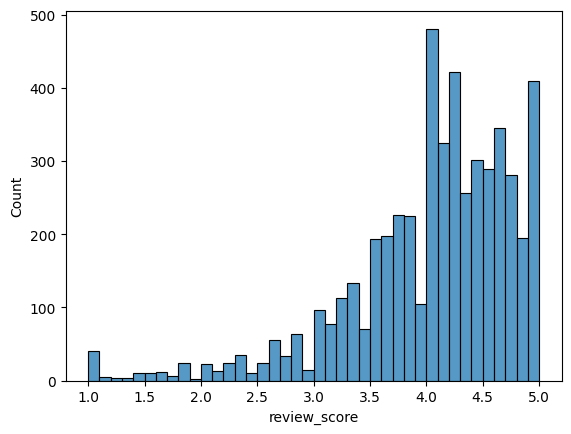

In [52]:
rsp = df.groupby('product_id').filter(lambda x: len(x) >= 5).groupby('product_id')['review_score'].mean()
sns.histplot(rsp)

Daqui, vemos pelo histograma que a distribuição das notas dos produtos (considerando apenas produtos com 5 ou mais unidades vendidas) lembra uma Beta, com parâmetro de forma $\alpha$ superior ao parâmetro de escala $\beta$ (caracterizando a assimetria à direita).

## Review score de vendedores
Aqui, iremos explorar as 5 maiores e 5 menores médias de review score por vendedores. Para as tabelas, considerou-se apenas vendedores com 30 ou mais vendas.

In [48]:
df.groupby('seller_id').filter(lambda x: len(x) >= 30).groupby('seller_id')['review_score'].mean().sort_values(ascending=False).head(5)

seller_id
48efc9d94a9834137efd9ea76b065a38    5.000000
b1fecf4da1fa2689bccffa0121953643    4.966667
334cab711dee080b079fa5779b584783    4.933333
3d0cd21d41671c46f82cd11176bf7277    4.903226
02f5837340d7eb4f653d676c7256523a    4.833333
Name: review_score, dtype: float64

In [49]:
df.groupby('seller_id').filter(lambda x: len(x) >= 30).groupby('seller_id')['review_score'].mean().sort_values(ascending=True).head(5)

seller_id
06532f10282704ef4c69168b914b77be    1.783784
1ca7077d890b907f89be8c954a02686a    2.189781
2709af9587499e95e803a6498a5a56e9    2.617021
ec4608a1f76453166bb312b2968aeaf4    2.694444
2eb70248d66e0e3ef83659f71b244378    2.716279
Name: review_score, dtype: float64

<Axes: xlabel='review_score', ylabel='Count'>

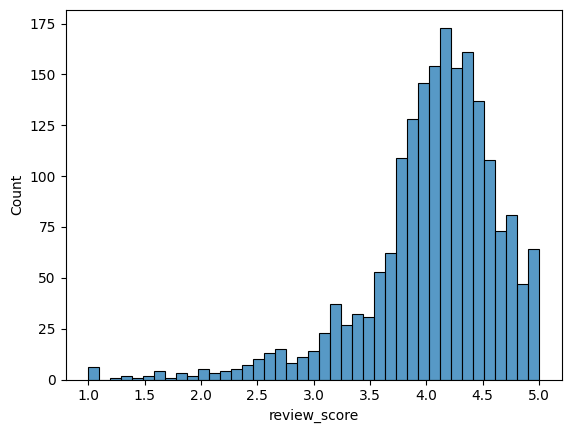

In [50]:
rss = df.groupby('seller_id').filter(lambda x: len(x) >= 5).groupby('seller_id')['review_score'].mean()
sns.histplot(rss)

Daqui, vemos pelo histograma que a distribuição das notas dos produtos por vendedor (considerando apenas vendedores com 5 ou mais vendas), da mesma forma que a distribuição das notas dos produtos, lembra uma Beta, com parâmetro de forma $\alpha$ superior ao parâmetro de escala $\beta$ (caracterizando a assimetria à direita).

## Frequência absoluta dos review scores
Como os review scores estão em escala Likert 1 a 5; ou seja, o consumidor teve a opção de dar nota 1, 2, 3, 4 ou 5 para a compra, podemos quantificar a quantidade de vezes que cada uma dessas notas aparece nos dados.

<Axes: xlabel='review_score', ylabel='count'>

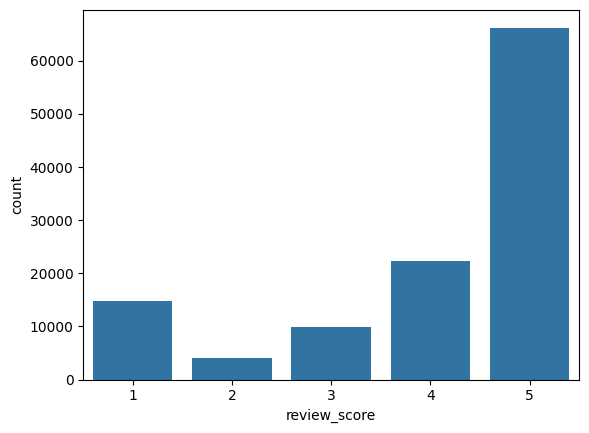

In [51]:
sns.countplot(x='review_score', data=df)

In [54]:
df['review_score'].value_counts()

review_score
5    66264
4    22286
1    14854
3     9840
2     4085
Name: count, dtype: int64

In [55]:
df['review_scoremax'] = df['review_score'].apply(lambda x: '1' if x > 4 else '0')

In [57]:
df['review_scoremax'].value_counts()

review_scoremax
1    66264
0    51065
Name: count, dtype: int64

Daqui, vemos uma maioria absoluta de notas máximas (5), superior inclusive que todas as outras notas agregadas.
Com esta motivação, iremos investigar se, a partir do comentário (review_comment_message), podemos inferir algo sobre a nota ter sido máxima ou não na próxima seção, com uso de aprendizado estatístico (inteligência artificial).

----------------------------------------------------------

## Verificação dos dados para processamento de linguagem natural

In [5]:
reviews['review_score2'] = reviews['review_score'].apply(lambda x: '1' if x > 4 else '0')

In [6]:
reviews['review_score2'].value_counts()

review_score2
1    57328
0    41896
Name: count, dtype: int64

In [7]:
dataset = reviews[['review_comment_message','review_score2']].rename(columns={'review_comment_message':'texto','review_score2':'rótulo'})
dataset

,texto,rótulo
0,NaN,0
1,NaN,1
2,NaN,1
3,Recebi bem antes do prazo estipulado.,1
4,Parabéns lojas lannister adorei comprar pela I...,1
...,...,...
99219,NaN,1
99220,NaN,1
99221,"Excelente mochila, entrega super rápida. Super...",1
99222,NaN,0


-----------

## Definindo função para processamento de linguagem natural - Diversos algoritmos

In [8]:
def NLP(dataset): # Input: Dataset inteiro: 2 colunas: texto + rótulo ; qual algoritmo usar

    # Bloco 1: Processamento do texto
    corpus = []
    for i in range(0,dataset.shape[0]):
        texto = re.sub('[^a-zA-Z]',' ',unidecode.unidecode(dataset['texto'][i]) )
        texto = texto.lower()
        texto = texto.split()
        ps = PorterStemmer()
        texto = [ps.stem(word) for word in texto if not word in set(stopwords.words('portuguese'))]
        texto = ' '.join(texto)
        corpus.append(texto)

    # Bloco 2: Embedding do texto
    # BoW
    cv=CountVectorizer(max_features = 5000)
    X=cv.fit_transform(corpus).toarray()
    y=dataset.iloc[:,1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)

    # Bloco 3 : Algorítmos de NLP
    metricas = {}

    model_RF = RandomForestClassifier(n_estimators = 400,criterion = "entropy",random_state = 0)
    model_RF.fit(X_train,y_train)     
    model_XGB = XGBClassifier(n_estimators = 400, max_depth = 2, learning_rate = 1, objective = 'binary:logistic')
    model_XGB.fit(X_train, y_train)
    model_GBC = GradientBoostingClassifier()
    model_GBC.fit(X_train, y_train)
    model_SVM = svm.SVC()
    model_SVM.fit(X_train, y_train)
    model_GNB = GaussianNB()
    model_GNB.fit(X_train, y_train)
    model_MNB = MultinomialNB()
    model_MNB.fit(X_train, y_train)
    model_CNB = ComplementNB()
    model_CNB.fit(X_train, y_train)

    # Bloco 4: Acumulador/organizador de resultados
    metricas = {}

    # Random Forest:
    y_pred_RF = model_RF.predict(X_test)
    metricas["Random Forest"] = {
        "acurácia": accuracy_score(y_test, y_pred_RF),
        "precisão": precision_score(y_test, y_pred_RF),
        "f1 score": f1_score(y_test, y_pred_RF)
    }

    # XGBoost:
    y_pred_XGB = model_XGB.predict(X_test)
    metricas["XGBoost"] = {
        "acurácia": accuracy_score(y_test, y_pred_XGB),
        "precisão": precision_score(y_test, y_pred_XGB),
        "f1 score": f1_score(y_test, y_pred_XGB)
    }

    y_pred_gbc = model_GBC.predict(X_test)
    metricas["Gradient Boosting Classifier"] = {
        "acurácia": accuracy_score(y_test, y_pred_gbc),
        "precisão": precision_score(y_test, y_pred_gbc),
        "f1 score": f1_score(y_test, y_pred_gbc)
    }

    # SVM:
    y_pred_svm = model_SVM.predict(X_test)
    metricas["SVM"] = {
        "acurácia": accuracy_score(y_test, y_pred_svm),
        "precisão": precision_score(y_test, y_pred_svm),
        "f1 score": f1_score(y_test, y_pred_svm)
    }

    # Naive Bayes Gaussian:
    y_pred_GNB = model_GNB.predict(X_test)
    metricas["Naive Bayes Gaussian"] = {
        "acurácia": accuracy_score(y_test, y_pred_GNB),
        "precisão": precision_score(y_test, y_pred_GNB),
        "f1 score": f1_score(y_test, y_pred_GNB)
    }

    # Naive Bayes Multinomial:
    y_pred_MNB = model_MNB.predict(X_test)
    metricas["Naive Bayes Multinomial"] = {
        "acurácia": accuracy_score(y_test, y_pred_MNB),
        "precisão": precision_score(y_test, y_pred_MNB),
        "f1 score": f1_score(y_test, y_pred_MNB)
    }

    # Naive Bayes Complement:
    y_pred_CNB = model_CNB.predict(X_test)
    metricas["Naive Bayes Complement"] = {
        "acurácia": accuracy_score(y_test, y_pred_CNB),
        "precisão": precision_score(y_test, y_pred_CNB),
        "f1 score": f1_score(y_test, y_pred_CNB)
    }

    # Bloco 5: Saída
    # Crie o DataFrame a partir do dicionário de métricas
    df = pd.DataFrame(metricas)

    # Transponha o DataFrame para que os nomes dos algoritmos sejam nas linhas e as métricas nas colunas
    df = df.transpose()

    # Imprima o DataFrame como uma tabela
    print(df)

últimos ajustes nos dados...

In [9]:
dataset = dataset.dropna(subset=['texto'])
dataset.index = range(len(dataset))

Testando a função para um pedaço dos dados apenas

In [10]:
NLP(dataset.head(30))

                              acurácia  precisão  f1 score
Random Forest                 0.444444  0.444444  0.615385
XGBoost                       0.555556  0.500000  0.666667
Gradient Boosting Classifier  0.444444  0.444444  0.615385
SVM                           0.444444  0.444444  0.615385
Naive Bayes Gaussian          0.444444  0.400000  0.444444
Naive Bayes Multinomial       0.555556  0.500000  0.666667
Naive Bayes Complement        0.666667  0.666667  0.571429


## NLP - Review x Nota
Aqui, buscou-se modelar o comentário de feedback, comparado não diretamente com a nota dada, mas simplesmente se deu nota máxima ou não, a fim de binarizar para simplificar o modelo e as análises.

In [11]:
NLP(dataset)

                              acurácia  precisão  f1 score
Random Forest                 0.821458  0.786349  0.828743
XGBoost                       0.825769  0.778361  0.836563
Gradient Boosting Classifier  0.799496  0.738215  0.818950
SVM                           0.831869  0.782763  0.842562
Naive Bayes Gaussian          0.645274  0.587246  0.724284
Naive Bayes Multinomial       0.827884  0.776284  0.839770
Naive Bayes Complement        0.825769  0.778916  0.836389


-------------------------

Daqui, vemos que é possível obter um bom ajuste de predição ao tentar prever se a nota será máxima ou não, baseado no comentário deixado pela pessoa. Como testou-se diversos algoritmos, e o resultado foi satisfatório com todas as técnicas, não é possível dizer que foi um vício do algoritmo. Além disso, concluimos que, por uma pequena margem, SVM (Support Vector Machine; Máquinas de suporte vetorial) foi o algoritmo mais eficiente em gerar predições de nota com base nos reviews.